LIBRARY YANG DIBUTUHKAN

In [233]:
# Impor library yang diperlukan
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

MENYIAPKAN DATASET

In [194]:
dataset_path = 'tomat'

MEMBUAT DAFTAR KATEGORI PADA BUAH TOMAT

In [195]:
# Daftar kategori kematangan buah tomat
categories = ['Matang', 'Mentah', 'Setengah Matang']

MENAMPILKAN SATU SAMPEL GAMBAR DARI SETIAP KATEGORI

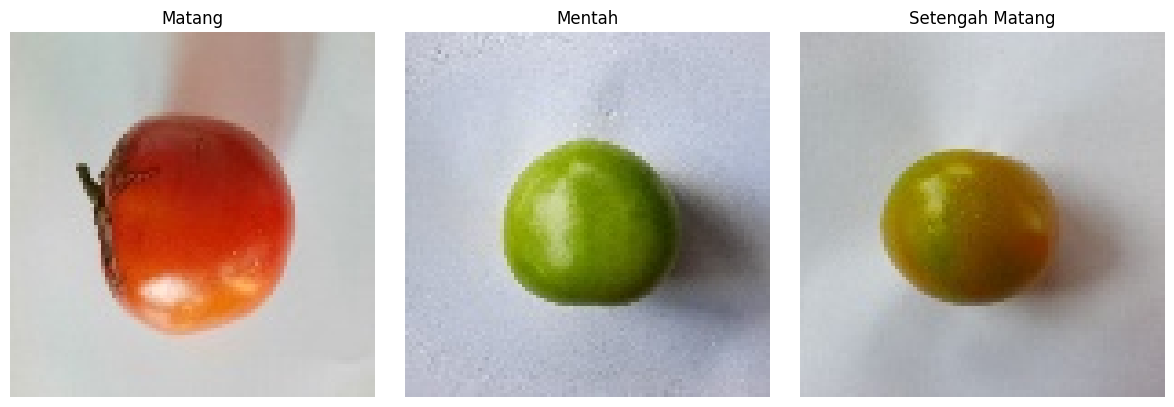

In [196]:
# Mengatur plot menjadi tampilan horizontal
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(12, 4))

# Menampilkan satu sampel gambar dari setiap kategori secara horizontal
for i, category in enumerate(categories):
    path = os.path.join(dataset_path, category)
    img_name = os.listdir(path)[0]  # Mengambil satu gambar pertama
    img_path = os.path.join(path, img_name)
    img = plt.imread(img_path)

    # Menampilkan gambar pada subplot yang sesuai
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()

PREPROCESSING DATA

In [197]:
# Resize ukuran gambar
img_size = (100, 100)

In [198]:
# List untuk menyimpan fitur dan label
X = []
y = []

In [199]:
# Loop melalui setiap gambar dalam dataset
for category in categories:
    path = os.path.join(dataset_path, category)
    
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        
        X.append(img)
        y.append(category)

In [200]:
# Konversi X dan y menjadi array numpy
X = np.array(X)
y = np.array(y)

In [201]:
# Normalisasi nilai piksel
X = X / 255.0

In [203]:
# Konversi label menjadi bilangan bulat menggunakan LabelEncoder
label_encoder = LabelEncoder()
label_encoder.classes_ = np.array(['Matang', 'Mentah', 'Setengah Matang'])
y = label_encoder.transform(y)

In [204]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [205]:
# Ubah label menjadi one-hot encoding menggunakan to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

MEMBANGUN MODEL CNN

In [206]:
# Bangun model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [207]:
# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [208]:
# Latih model
history = model.fit(X_train, y_train_encoded, epochs=4, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/4
5/5 [==============================] - 2s 274ms/step - loss: 1.3577 - accuracy: 0.3500 - val_loss: 1.3627 - val_accuracy: 0.5610
Epoch 2/4
5/5 [==============================] - 1s 209ms/step - loss: 0.9091 - accuracy: 0.6375 - val_loss: 0.7611 - val_accuracy: 0.6341
Epoch 3/4
5/5 [==============================] - 1s 199ms/step - loss: 0.5130 - accuracy: 0.7750 - val_loss: 0.3363 - val_accuracy: 0.9756
Epoch 4/4
5/5 [==============================] - 1s 198ms/step - loss: 0.1764 - accuracy: 0.9750 - val_loss: 0.1185 - val_accuracy: 0.9756


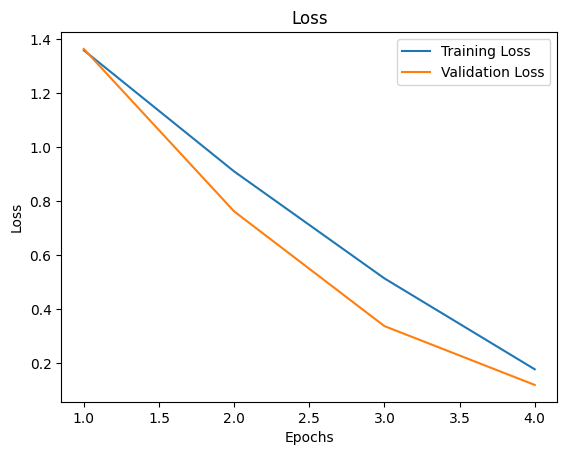

In [209]:
# Visualisasi grafik loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

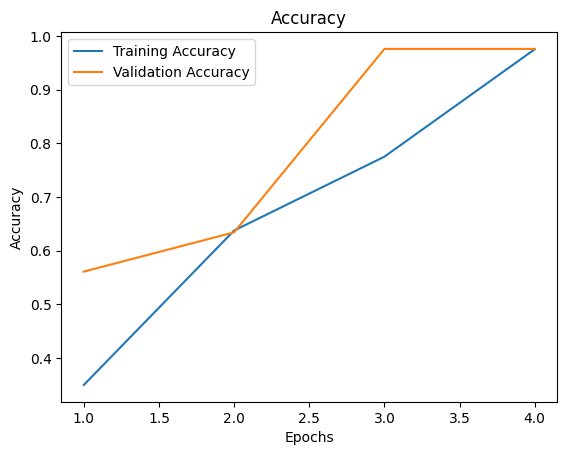

In [210]:
# Visualisasi grafik akurasi
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [211]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.1185 - accuracy: 0.9756
Test Loss: 0.11850197613239288
Test Accuracy: 0.9756097793579102


1/1 [==============================] - 0s 22ms/step


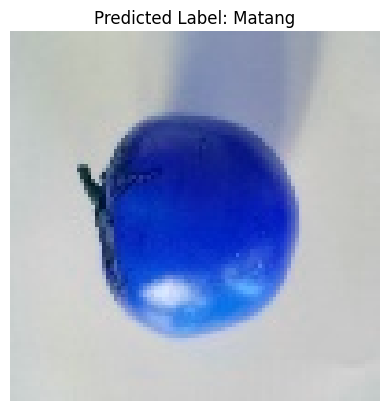

In [246]:
# Contoh penggunaan model untuk prediksi pada data baru
new_data_path = 'tomat/Matang/1 (1).jpg'  # Ganti dengan path ke gambar baru yang ingin diprediksi
new_data = cv2.imread(new_data_path)
new_data = cv2.resize(new_data, img_size)
new_data = new_data.reshape(1, 100, 100, 3)
new_data = new_data / 255.0
prediction = model.predict(new_data)
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

# Menampilkan gambar baru yang diuji
plt.imshow(new_data[0])
plt.title('Predicted Label: ' + predicted_label[0])
plt.axis('off')
plt.show()


In [232]:
# Simpan model ke file model.h5
model.save('model.h5')

C:\Users\deaga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
